In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from scipy.special import result
from sklearn.ensemble.tests.test_forest import y_large

import plot_analysis_result as plot
import importlib
import glob
importlib.reload(plot)
input_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/constant/after_Smooth/question_3'
output_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/constant/after_Smooth/question_3'
fn_list = glob.glob(f'{input_folder}/result_*.txt.gz')
os.makedirs(output_folder, exist_ok=True)
import importlib
importlib.reload(plot)
result_df = plot.read_all_result_files(input_folder, methods=['simpleSmooth', 'simpleSolver'])

       N     G  time_traverse_gene  label_time  h_bin  seed  lambda_smooth  \
0  27000  27.0               270.0           5    0.1  9999            0.1   
1  27000  27.0               270.0           5    0.1  9999            0.5   
2  27000  27.0               270.0           5    0.1  9999            1.0   
3  27000  27.0                90.0           5    0.1  9999            0.1   
4  27000  27.0                90.0           5    0.1  9999            0.5   

                                           output_fn  wMSE_simpleSmooth  \
0  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...           0.003487   
1  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...           0.002981   
2  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...           0.002663   
3  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...           0.005161   
4  /gladstone/engelhardt/lab/hvu//RNA_rates/solve...           0.001785   

   wMSE_simpleSolver  wFC_simpleSmooth  wFC_simpleSolver  
0           0.003811 

In [4]:
# plot5: Compare the performance of different solvers, across different true_h for only one case:
import importlib
importlib.reload(plot)
def read_one_result_raw(fn, summ_df, methods = ['simpleSolver', 'simpleSmooth', 'bayesLinearSolver', 'bayesRBFSolver', 'logNormalSolver']):
    '''
    Read one result file and return the results as a dictionary
    :param fn: str, the filename
    :return: dict
    '''
    df = pd.read_csv(fn, sep='\t', header=0, index_col=None)  # start, end, true_h and then all the diffemrent solver results
    file_index = int(fn.split('/')[-1].split('.')[0].split('_')[-1])
    try:
        df = df.rename(columns={'txrate': 'true_h'})
    except:
        pass
    h_bin =summ_df.loc[file_index, 'h_bin']
    lambda_smooth = summ_df.loc[file_index, 'lambda_smooth']
    df['h_bin'] = h_bin
    df['lambda_smooth'] = lambda_smooth
    return df

run_fn_list = [f'{input_folder}/result_{i}.txt.gz' for i in range(len(fn_list))]
run_df_list = list(map(lambda x: read_one_result_raw(x, result_df, methods = ['simpleSmooth', 'simpleSolver']), run_fn_list))
run_df = pd.concat(run_df_list)

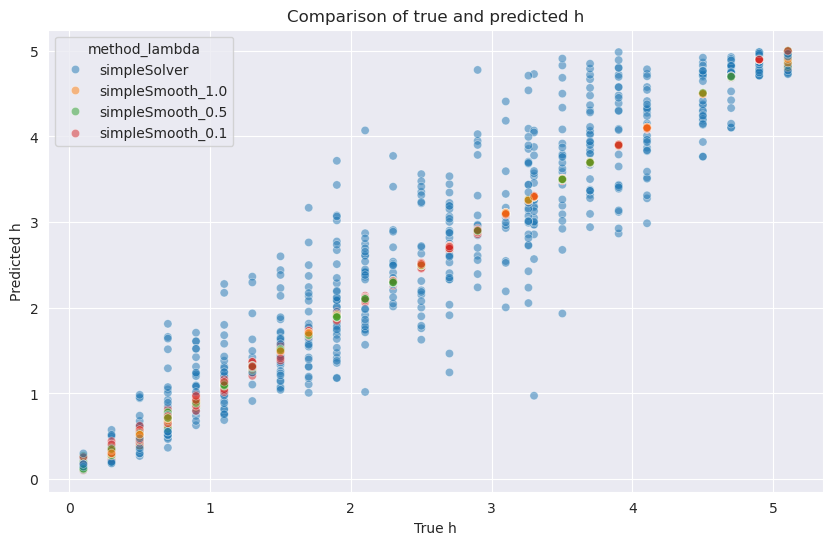

In [7]:
def question3_plot1(run_df, save_fn=None):
    '''
    x-axis:true_h, y-axis: pred_h, hue: method (simpleSmooth_lambda_smooth, simpleSolver)
    :param run_df: pd.DataFrame, the dataframe containing the results
    :param output_folder: str, the folder to save the plots
    :return: None
    '''
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    plot_df = run_df.melt(id_vars=['true_h', 'lambda_smooth'], value_vars=['simpleSmooth', 'simpleSolver'], var_name='method', value_name='pred_h')
    plot_df = plot_df[~((plot_df['method'] == 'simpleSolver') & (plot_df['lambda_smooth'] != 1))] # filter out rows simpleSolver with lambda_smooth != 1, others are just replicate
    plot_df['method_lambda'] = plot_df['method'] + '_' + plot_df['lambda_smooth'].astype(str)
    plot_df['method_lambda'] = plot_df['method_lambda'].apply(lambda x: 'simpleSolver' if x.startswith('simpleSolver') else x) # if it starts with simpleSolver, then remove the lambda_smooth
    # sample rows to get only 10% of the datapoints
    plot_df = plot_df.sample(frac=0.1)
    sns.scatterplot(data=plot_df, x='true_h', y='pred_h', hue='method_lambda', ax=ax, alpha = 0.5)
    ax.set_xlabel('True h')
    ax.set_ylabel('Predicted h')
    ax.set_title('Comparison of true and predicted h')
    if save_fn is not None:
        plt.savefig(save_fn)
    plt.show()
    return 

question3_plot1(run_df, save_fn=f'{output_folder}/question3_plot1.png')

[Text(0, 0.5, '0.1'), Text(0, 1.5, '0.3'), Text(0, 2.5, '0.5'), Text(0, 3.5, '0.7'), Text(0, 4.5, '0.9'), Text(0, 5.5, '1.1'), Text(0, 6.5, '1.3'), Text(0, 7.5, '1.5'), Text(0, 8.5, '1.7'), Text(0, 9.5, '1.9'), Text(0, 10.5, '2.1'), Text(0, 11.5, '2.3'), Text(0, 12.5, '2.5'), Text(0, 13.5, '2.7'), Text(0, 14.5, '2.9'), Text(0, 15.5, '3.1'), Text(0, 16.5, '3.26'), Text(0, 17.5, '3.3'), Text(0, 18.5, '3.5'), Text(0, 19.5, '3.7'), Text(0, 20.5, '3.9'), Text(0, 21.5, '4.1'), Text(0, 22.5, '4.5'), Text(0, 23.5, '4.7'), Text(0, 24.5, '4.9'), Text(0, 25.5, '5.1')]
[]


/tmp/ipykernel_3454386/933220083.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to accommodate colorbar


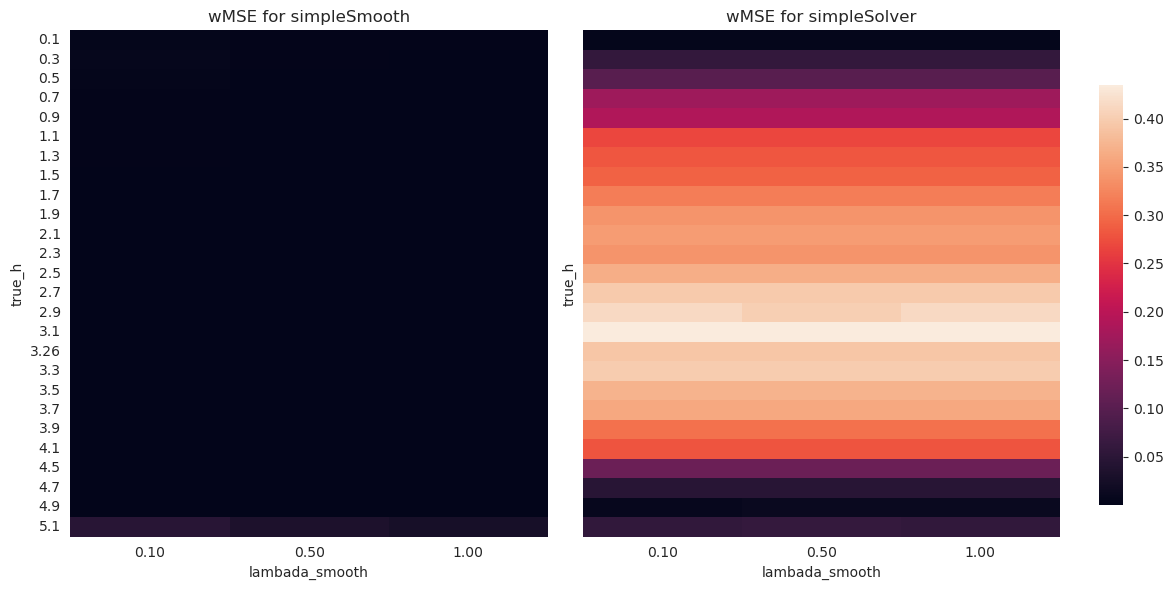

(<Figure size 1200x600 with 3 Axes>,
 array([<Axes: title={'center': 'wMSE for simpleSmooth'}, xlabel='lambada_smooth', ylabel='true_h'>,
        <Axes: title={'center': 'wMSE for simpleSolver'}, xlabel='lambada_smooth', ylabel='true_h'>],
       dtype=object))

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def question3_plot2(result_df, metric='wFC', save_fn=None, methods=['simpleSmooth', 'simpleSolver']):
    '''
    Heatmap for wMSE/wFC:
    - x-axis: different values of true_h (vary_fold)
    - y-axis: different values of h_bin
    - heatmap: values of wMSE/wFC for each method
    '''
    result_df['true_h'] = (result_df['G'] / result_df['time_traverse_gene']).round(2)
    num_methods = len(methods)

    # Determine vmin and vmax for consistent color scales
    vmin = result_df[[f'{metric}_{method}' for method in methods]].min().min()
    vmax = result_df[[f'{metric}_{method}' for method in methods]].max().max()

    fig, axes = plt.subplots(1, num_methods, figsize=(6 * num_methods, 6), sharex=True, sharey=True)

    # Add a colorbar axis to share the colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Position for shared colorbar
    
    for i, method in enumerate(methods):
        ax = axes[i]
        plot_df = result_df.pivot(columns='lambda_smooth', index='true_h', values=f'{metric}_{method}')
        sns.heatmap(
            data=plot_df,
            ax=ax, vmin=vmin, vmax=vmax, cbar=i == 0, cbar_ax=None if i else cbar_ax,  # Share colorbar, only the first ax gets the color bar next to it
            cmap=None
        )
        ax.set_title(f'{metric} for {method}')
        ax.set_xlabel('lambada_smooth')
        ax.set_ylabel('true_h')
        # Format x-axis labels
        x_labels = ax.get_xticklabels()
        x_labels = [f'{float(label.get_text()):.2f}' for label in x_labels]
        y_labels = ax.get_yticklabels()
        print(y_labels)
        # ax.set_yticklabels(y_labels)
        ax.set_xticklabels(x_labels)

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to accommodate colorbar

    if save_fn:
        plt.savefig(save_fn)

    plt.show()
    return fig, axes


question3_plot2(result_df, metric='wMSE', save_fn=os.path.join(output_folder, 'question3_plot2.png'))
